In [ ]:
"""R package installer for C50 and dependencies using rpy2.

This module handles the installation and verification of R packages
required for C50 machine learning library, including helper packages.
"""

import rpy2.robjects as ro
from rpy2.robjects.packages import importr


def setup_cran_mirror():
    """Configure CRAN mirror for package installation.
    
    Sets the first available CRAN mirror as the package repository source.
    """
    utils = importr('utils')
    utils.chooseCRANmirror(ind=1)


def install_c50_package():
    """Install the C50 R package.
    
    Equivalent to R command: install.packages("C50")
    
    Returns:
        bool: True if installation completes successfully.
    """
    print("Starting installation of R package: C50")
    utils = importr('utils')
    utils.install_packages("C50")
    print("C50 installation completed")
    return True


def install_helper_packages():
    """Install helper R packages: foreign and MASS.
    
    These packages provide data import/export and statistical functions.
    Equivalent to R command: install.packages(c("foreign", "MASS"))
    
    Returns:
        bool: True if installation completes successfully.
    """
    print("Starting installation of R helper packages: foreign, MASS")
    utils = importr('utils')
    package_names = ro.StrVector(["foreign", "MASS"])
    utils.install_packages(package_names)
    print("Helper packages installation completed")
    return True


def verify_c50_installation():
    """Verify C50 package installation by attempting to load it.
    
    Equivalent to R command: library(C50)
    
    Returns:
        bool: True if C50 package loads successfully, False otherwise.
    
    Raises:
        RuntimeError: If C50 package import fails with critical error.
    """
    try:
        c50_pkg = importr('C50')
        print("R package C50 loaded successfully! Ready for use.")
        return True
    except Exception as e:
        error_msg = f"Failed to load C50 package: {e}"
        print(error_msg)
        raise RuntimeError(error_msg) from e


def install_and_verify_c50_environment():
    """Complete installation and verification workflow for C50 environment.
    
    This function orchestrates the entire setup process:
    1. Configure CRAN mirror
    2. Install C50 package
    3. Install helper packages
    4. Verify C50 installation
    
    Returns:
        bool: True if entire setup completes successfully.
    
    Raises:
        RuntimeError: If any installation or verification step fails.
    """
    try:
        setup_cran_mirror()
        install_c50_package()
        install_helper_packages()
        verify_c50_installation()
        return True
    except Exception as e:
        raise RuntimeError(f"C50 environment setup failed: {e}") from e


if __name__ == "__main__":
    """Entry point for standalone execution of C50 environment setup."""
    install_and_verify_c50_environment()

1. Loading and preprocessing data...
Loading raw data
Training data shape: (32561, 15)
Test data shape: (16281, 15)

Cleaning data...
Training data: 32561 → 30162 (removed 2399 rows)
Test data: 16281 → 15060 (removed 1221 rows)

Encoding categorical features...
✓ Encoding complete for 8 categorical features

Data preparation complete
Number of features: 14
  - Continuous features: 6
  - Categorical features: 8
Discretized: False

Data shapes:
  Training set: (30162, 14)
  Test set: (15060, 14)

Label distribution (>50K proportion):
  Training set: 24.89%
  Test set: 24.57%

Number of Features: 14
Training Set Shape: (30162, 14), Testing Set Shape: (15060, 14)

2. Analyzing pruning path...

Analyzing pruning path...
Selected ccp_alpha values:
  Light Pruning: 0.0
  Optimal Pruning: 0.00011822019679588779
  Heavy Pruning: 0.027353459326994095

Training CART model (ccp_alpha=0.0)...

=== Light Pruning (Overfit) (ccp_alpha=0.0) ===
Training Accuracy: 1.0000
Testing Accuracy: 0.8024
Overfit

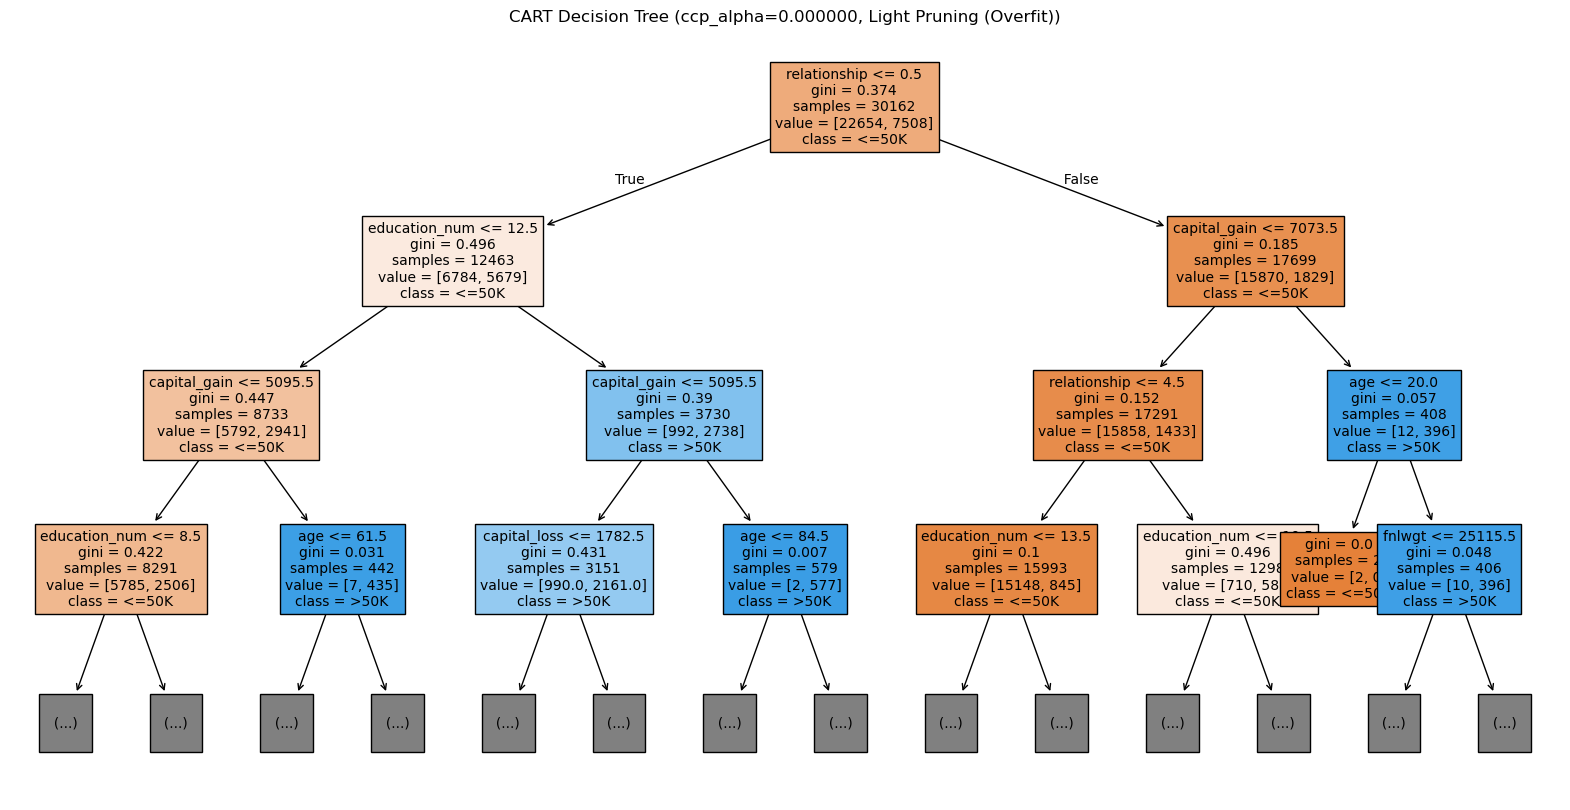


Training CART model (ccp_alpha=0.00011822019679588779)...

=== Optimal Pruning (Balanced) (ccp_alpha=0.00011822019679588779) ===
Training Accuracy: 0.8702
Testing Accuracy: 0.8526
Overfitting Gap: 0.0176
Number of Nodes: 277
Tree Depth: 20

=== Test Set Classification Report ===
              precision    recall  f1-score   support

       <=50K     0.8772    0.9356    0.9054     11360
        >50K     0.7514    0.5978    0.6659      3700

    accuracy                         0.8526     15060
   macro avg     0.8143    0.7667    0.7856     15060
weighted avg     0.8463    0.8526    0.8466     15060


=== Test Set Confusion Matrix ===
            Pred <=50K  Pred >50K
True <=50K       10628        732
True >50K         1488       2212


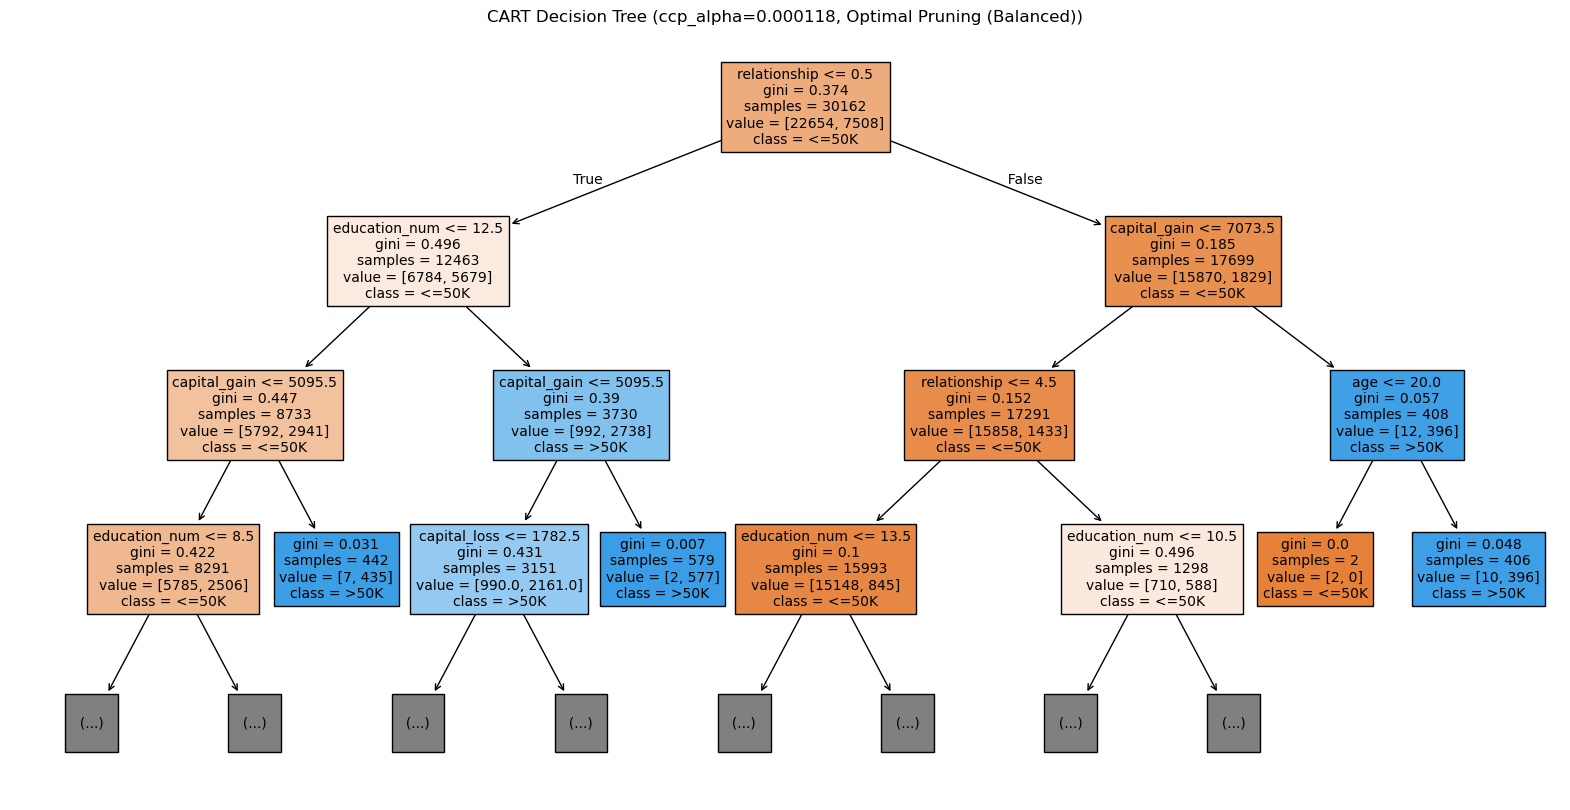


Training CART model (ccp_alpha=0.027353459326994095)...

=== Heavy Pruning (Underfit) (ccp_alpha=0.027353459326994095) ===
Training Accuracy: 0.7511
Testing Accuracy: 0.7543
Overfitting Gap: -0.0032
Number of Nodes: 3
Tree Depth: 1

=== Test Set Classification Report ===
              precision    recall  f1-score   support

       <=50K     0.7543    1.0000    0.8600     11360
        >50K     0.0000    0.0000    0.0000      3700

    accuracy                         0.7543     15060
   macro avg     0.3772    0.5000    0.4300     15060
weighted avg     0.5690    0.7543    0.6487     15060


=== Test Set Confusion Matrix ===
            Pred <=50K  Pred >50K
True <=50K       11360          0
True >50K         3700          0


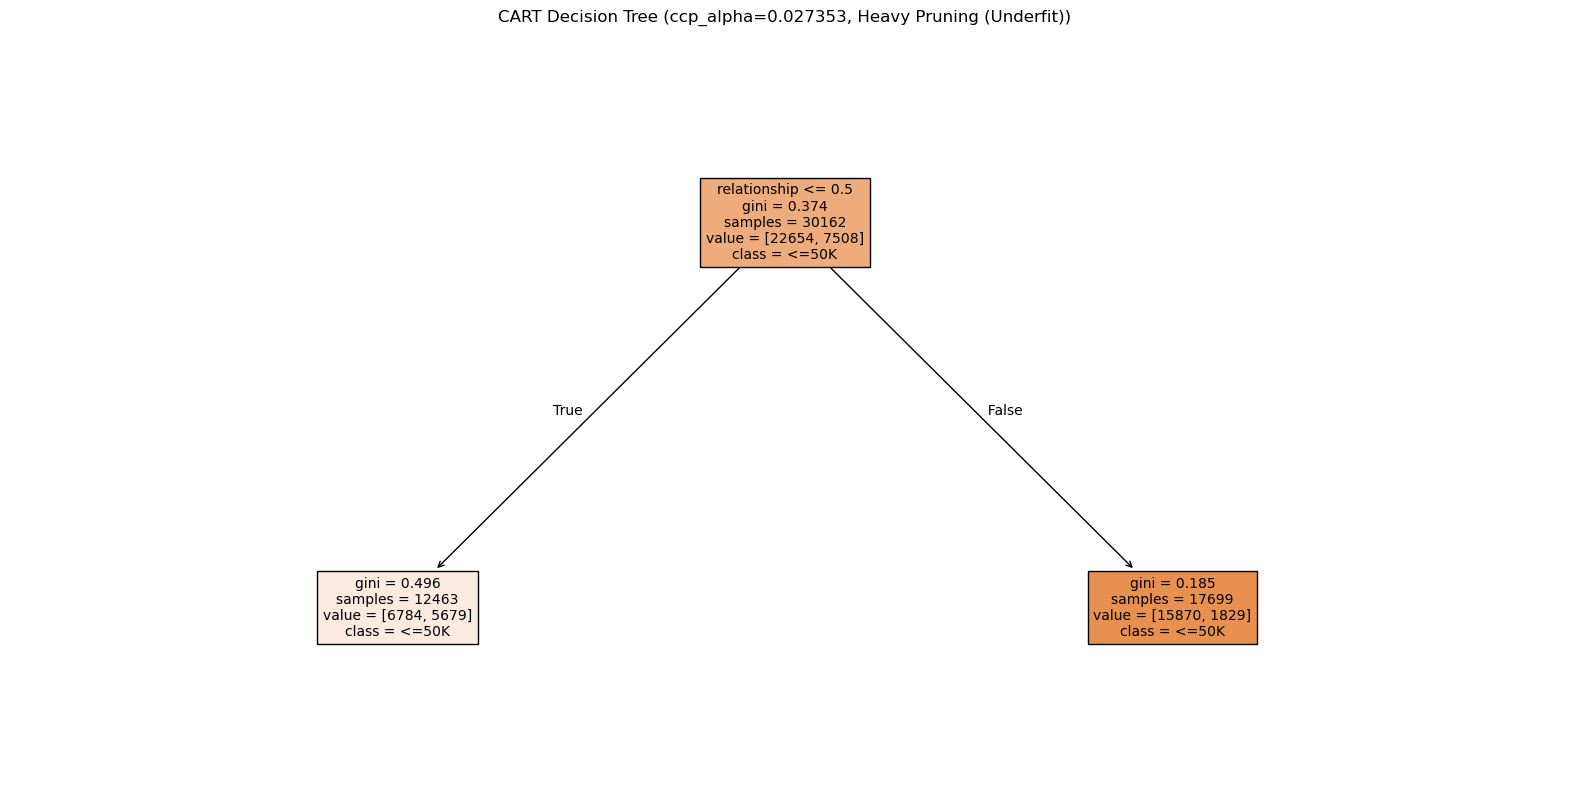


3. Plotting pruning analysis...


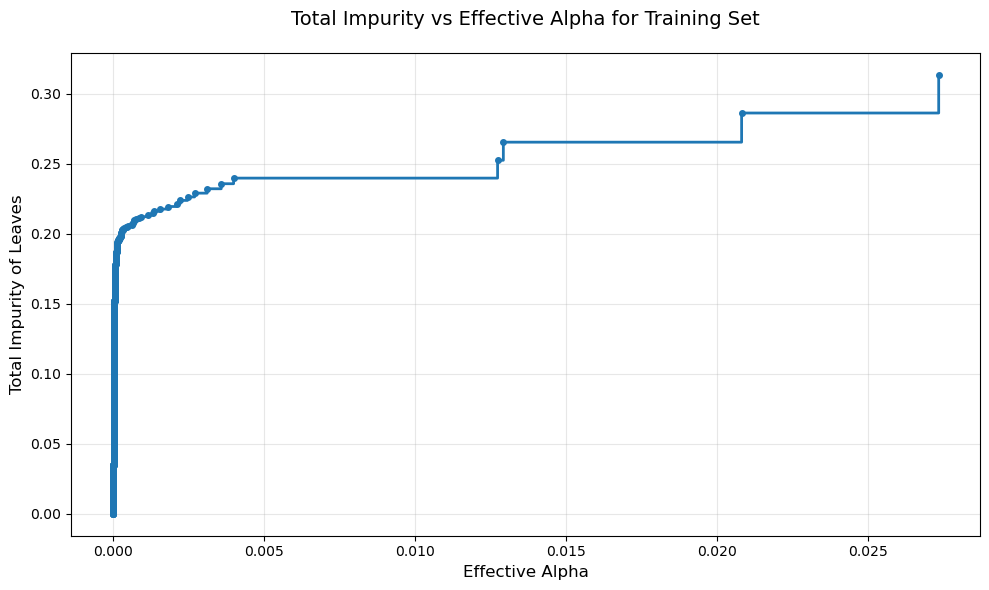

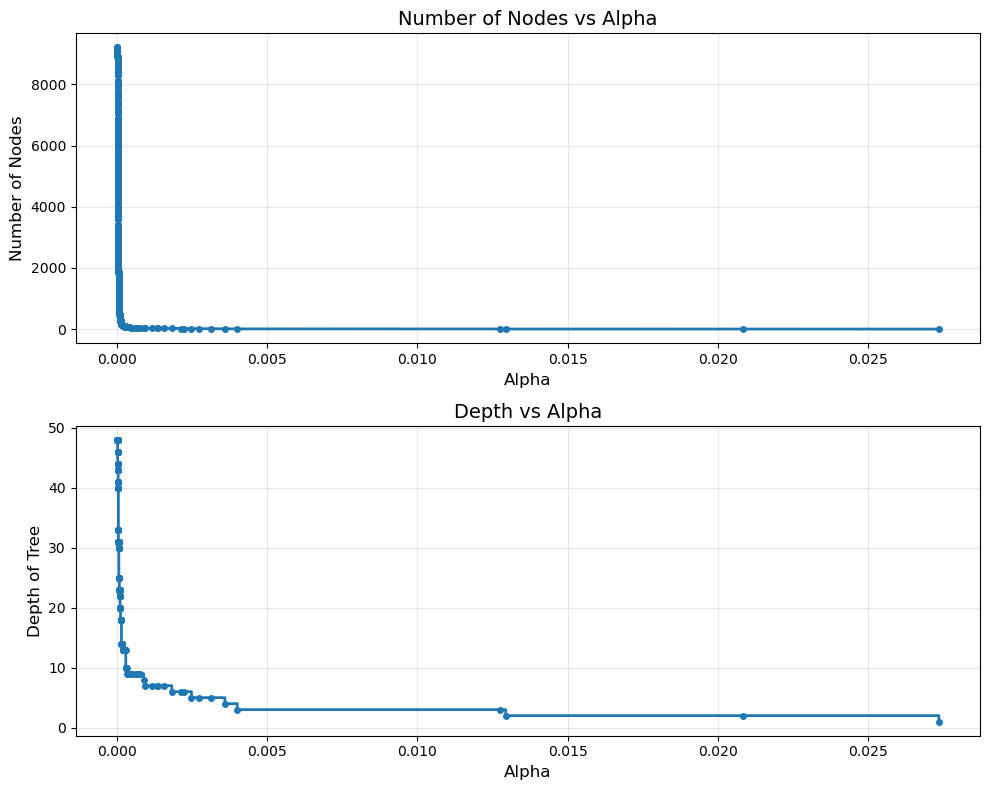

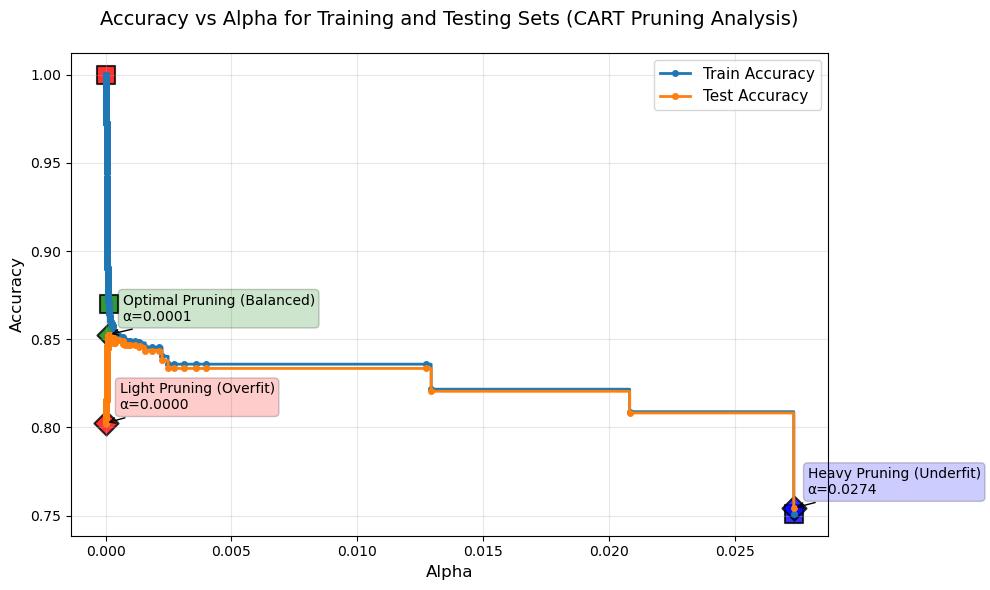


=== Comparison of Three ccp_alpha Settings ===
Light Pruning (α=0.000000): Train Accuracy=1.0000, Test Accuracy=0.8024
Optimal Pruning (α=0.000118): Train Accuracy=0.8702, Test Accuracy=0.8526
Heavy Pruning (α=0.027353): Train Accuracy=0.8090, Test Accuracy=0.8082

=== Summary Comparison Table ===
 ccp_alpha  train_accuracy  test_accuracy  overfitting_gap  tree_nodes  tree_depth
  0.000000          1.0000         0.8024           0.1976        9205          48
  0.000118          0.8702         0.8526           0.0176         277          20
  0.027353          0.7511         0.7543          -0.0032           3           1

=== Bias-Variance Tradeoff Analysis ===
Light Pruning: High variance (overfitting), high training accuracy but lower test accuracy
Optimal Pruning: Balanced bias and variance, highest test accuracy
Heavy Pruning: High bias (underfitting), low training and test accuracy

=== Execution Completed ===


In [3]:
%matplotlib inline
"""
Cost Complexity Pruning Analysis for CART Decision Tree.

This module performs cost complexity pruning analysis on a CART decision tree using the adult dataset.
It generates plots for pruning metrics and compares classification accuracy for three ccp_alpha settings.
"""

import warnings
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from hw1_part2_preprocessing import UnifiedDataPreprocessor

warnings.filterwarnings("ignore")

# Constants
RESULTS_DIR = "results/part3"
PLOT_DPI = 300
FIGURE_SIZE = (20, 10)
FONT_SIZE = 10
MAX_TREE_DEPTH = 3
RANDOM_STATE = 42

def train_and_evaluate_cart_pruned(
    x_train, y_train, x_test, y_test, ccp_alpha, feature_names, model_name, save_plots=False
):
    """Train and evaluate a CART model with specified ccp_alpha.

    Args:
        x_train (array-like): Training feature data.
        y_train (array-like): Training target data.
        x_test (array-like): Testing feature data.
        y_test (array-like): Testing target data.
        ccp_alpha (float): Cost complexity pruning parameter.
        feature_names (list): Names of features.
        model_name (str): Name of the model for display purposes.
        save_plots (bool): Whether to save plots to file. Default is False.

    Returns:
        tuple: Trained model, test predictions, and evaluation metrics.
    """
    print(f"\nTraining CART model (ccp_alpha={ccp_alpha})...")

    model = DecisionTreeClassifier(
        criterion="gini",
        splitter="best",
        max_depth=None,
        min_samples_split=2,
        min_samples_leaf=1,
        random_state=RANDOM_STATE,
        ccp_alpha=ccp_alpha,
    )

    model.fit(x_train, y_train)
    train_pred = model.predict(x_train)
    test_pred = model.predict(x_test)

    train_accuracy = accuracy_score(y_train, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred)
    overfitting_gap = train_accuracy - test_accuracy

    metrics = {
        "ccp_alpha": ccp_alpha,
        "train_accuracy": train_accuracy,
        "test_accuracy": test_accuracy,
        "overfitting_gap": overfitting_gap,
        "tree_nodes": model.tree_.node_count,
        "tree_depth": model.tree_.max_depth,
    }

    print(f"\n=== {model_name} (ccp_alpha={ccp_alpha}) ===")
    print(f"Training Accuracy: {train_accuracy:.4f}")
    print(f"Testing Accuracy: {test_accuracy:.4f}")
    print(f"Overfitting Gap: {overfitting_gap:.4f}")
    print(f"Number of Nodes: {model.tree_.node_count:,}")
    print(f"Tree Depth: {model.tree_.max_depth}")

    print("\n=== Test Set Classification Report ===")
    print(
        classification_report(
            y_test,
            test_pred,
            target_names=["<=50K", ">50K"],
            digits=4,
            zero_division=0,
        )
    )

    print("\n=== Test Set Confusion Matrix ===")
    cm = confusion_matrix(y_test, test_pred)
    cm_df = pd.DataFrame(
        cm, index=["True <=50K", "True >50K"], columns=["Pred <=50K", "Pred >50K"]
    )
    print(cm_df)

    plt.figure(figsize=FIGURE_SIZE)
    plot_tree(
        model,
        feature_names=feature_names,
        class_names=["<=50K", ">50K"],
        filled=True,
        max_depth=MAX_TREE_DEPTH,
        fontsize=FONT_SIZE,
    )
    plt.title(f"CART Decision Tree (ccp_alpha={ccp_alpha:.6f}, {model_name})")
    if save_plots:
        output_dir = Path.cwd().parent.parent.parent / "hw1_m11435021" / RESULTS_DIR
        output_dir.mkdir(parents=True, exist_ok=True)
        plt.savefig(
            output_dir / f"cart_tree_ccp_alpha_{ccp_alpha:.6f}.png",
            dpi=PLOT_DPI,
            bbox_inches="tight",
        )
        print(f"✓ Saved: {output_dir / f'cart_tree_ccp_alpha_{ccp_alpha:.6f}.png'}")
    plt.show()  # 直接顯示圖表
    plt.close()

    return model, test_pred, metrics

def analyze_pruning_path(x_train, y_train, x_test, y_test):
    """Analyze the pruning path to identify candidate ccp_alpha values.

    Args:
        x_train (array-like): Training feature data.
        y_train (array-like): Training target data.
        x_test (array-like): Testing feature data.
        y_test (array-like): Testing target data.

    Returns:
        tuple: Three selected ccp_alpha values and pruning metrics dictionary.
    """
    print("\nAnalyzing pruning path...")
    model = DecisionTreeClassifier(random_state=RANDOM_STATE)
    path = model.cost_complexity_pruning_path(x_train, y_train)
    ccp_alphas, impurities = path.ccp_alphas, path.impurities

    train_accuracies = []
    test_accuracies = []
    node_counts = []
    depths = []

    for ccp_alpha in ccp_alphas:
        model = DecisionTreeClassifier(random_state=RANDOM_STATE, ccp_alpha=ccp_alpha)
        model.fit(x_train, y_train)
        train_accuracies.append(accuracy_score(y_train, model.predict(x_train)))
        test_accuracies.append(accuracy_score(y_test, model.predict(x_test)))
        node_counts.append(model.tree_.node_count)
        depths.append(model.tree_.max_depth)

    idx_optimal = np.argmax(test_accuracies)
    ccp_alpha_light = 0.0
    ccp_alpha_optimal = ccp_alphas[idx_optimal]
    ccp_alpha_heavy = ccp_alphas[-2] if len(ccp_alphas) > 2 else ccp_alphas[-1]

    return (
        ccp_alpha_light,
        ccp_alpha_optimal,
        ccp_alpha_heavy,
        {
            "ccp_alphas": ccp_alphas[:-1],
            "impurities": impurities[:-1],
            "train_accuracies": train_accuracies[:-1],
            "test_accuracies": test_accuracies[:-1],
            "node_counts": node_counts[:-1],
            "depths": depths[:-1],
        },
    )

def plot_pruning_analysis(pruning_metrics, selected_alphas, save_plots=False):
    """Generate plots for pruning analysis metrics.

    Args:
        pruning_metrics (dict): Dictionary containing pruning metrics.
        selected_alphas (list): List of three selected ccp_alpha values.
        save_plots (bool): Whether to save plots to file. Default is False.
    """
    ccp_alphas = pruning_metrics["ccp_alphas"]
    impurities = pruning_metrics["impurities"]
    node_counts = pruning_metrics["node_counts"]
    depths = pruning_metrics["depths"]
    train_accuracies = pruning_metrics["train_accuracies"]
    test_accuracies = pruning_metrics["test_accuracies"]

    output_dir = Path.cwd().parent.parent.parent / "hw1_m11435021" / RESULTS_DIR
    if save_plots:
        output_dir.mkdir(parents=True, exist_ok=True)

    plt.figure(figsize=(10, 6))
    plt.plot(
        ccp_alphas,
        impurities,
        marker="o",
        drawstyle="steps-post",
        linewidth=2,
        markersize=4,
    )
    plt.xlabel("Effective Alpha", fontsize=12)
    plt.ylabel("Total Impurity of Leaves", fontsize=12)
    plt.title("Total Impurity vs Effective Alpha for Training Set", fontsize=14, pad=20)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    if save_plots:
        plt.savefig(output_dir / "total_impurity_vs_alpha.png", dpi=PLOT_DPI, bbox_inches="tight")
        print(f"✓ Saved: {output_dir / 'total_impurity_vs_alpha.png'}")
    plt.show()  # 直接顯示圖表
    plt.close()

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
    ax1.plot(
        ccp_alphas,
        node_counts,
        marker="o",
        drawstyle="steps-post",
        linewidth=2,
        markersize=4,
    )
    ax1.set_xlabel("Alpha", fontsize=12)
    ax1.set_ylabel("Number of Nodes", fontsize=12)
    ax1.set_title("Number of Nodes vs Alpha", fontsize=14)
    ax1.grid(True, alpha=0.3)

    ax2.plot(
        ccp_alphas,
        depths,
        marker="o",
        drawstyle="steps-post",
        linewidth=2,
        markersize=4,
    )
    ax2.set_xlabel("Alpha", fontsize=12)
    ax2.set_ylabel("Depth of Tree", fontsize=12)
    ax2.set_title("Depth vs Alpha", fontsize=14)
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    if save_plots:
        plt.savefig(output_dir / "nodes_and_depth_vs_alpha.png", dpi=PLOT_DPI, bbox_inches="tight")
        print(f"✓ Saved: {output_dir / 'nodes_and_depth_vs_alpha.png'}")
    plt.show()  # 直接顯示圖表
    plt.close()

    plt.figure(figsize=(10, 6))
    line_train, = plt.plot(
        ccp_alphas,
        train_accuracies,
        marker="o",
        label="Train Accuracy",
        drawstyle="steps-post",
        linewidth=2,
        markersize=4,
    )
    line_test, = plt.plot(
        ccp_alphas,
        test_accuracies,
        marker="o",
        label="Test Accuracy",
        drawstyle="steps-post",
        linewidth=2,
        markersize=4,
    )

    colors = ["red", "green", "blue"]
    labels = ["Light Pruning (Overfit)", "Optimal Pruning (Balanced)", "Heavy Pruning (Underfit)"]

    for alpha, label, color in zip(selected_alphas, labels, colors):
        idx = np.argmin(np.abs(np.array(ccp_alphas) - alpha))
        plt.scatter(
            ccp_alphas[idx],
            train_accuracies[idx],
            color=color,
            s=150,
            marker="s",
            alpha=0.8,
            edgecolors="black",
            linewidth=1.5,
        )
        plt.scatter(
            ccp_alphas[idx],
            test_accuracies[idx],
            color=color,
            s=150,
            marker="D",
            alpha=0.8,
            edgecolors="black",
            linewidth=1.5,
        )
        plt.annotate(
            f"{label}\nα={ccp_alphas[idx]:.4f}",
            xy=(ccp_alphas[idx], test_accuracies[idx]),
            xytext=(10, 10),
            textcoords="offset points",
            fontsize=10,
            ha="left",
            bbox=dict(boxstyle="round,pad=0.3", facecolor=color, alpha=0.2),
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0"),
        )

    plt.xlabel("Alpha", fontsize=12)
    plt.ylabel("Accuracy", fontsize=12)
    plt.title("Accuracy vs Alpha for Training and Testing Sets (CART Pruning Analysis)", fontsize=14, pad=20)
    plt.legend(handles=[line_train, line_test], fontsize=11)
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    if save_plots:
        plt.savefig(output_dir / "accuracy_vs_alpha_cart.png", dpi=PLOT_DPI, bbox_inches="tight")
        print(f"✓ Saved: {output_dir / 'accuracy_vs_alpha_cart.png'}")
    plt.show()  # 直接顯示圖表
    plt.close()

    print("\n=== Comparison of Three ccp_alpha Settings ===")
    print(
        f"Light Pruning (α={selected_alphas[0]:.6f}): Train Accuracy={train_accuracies[0]:.4f}, Test Accuracy={test_accuracies[0]:.4f}"
    )
    print(
        f"Optimal Pruning (α={selected_alphas[1]:.6f}): Train Accuracy={train_accuracies[np.argmax(test_accuracies)]:.4f}, Test Accuracy={max(test_accuracies):.4f}"
    )
    print(
        f"Heavy Pruning (α={selected_alphas[2]:.6f}): Train Accuracy={train_accuracies[-2]:.4f}, Test Accuracy={test_accuracies[-2]:.4f}"
    )

def main(save_plots=False):
    """Perform pruning analysis and compare three ccp_alpha settings.

    Args:
        save_plots (bool): Whether to save plots to file. Default is False.

    Returns:
        list: List of metrics dictionaries for each ccp_alpha setting.

    Raises:
        Exception: If an error occurs during execution.
    """
    try:
        print("1. Loading and preprocessing data...")
        preprocessor = UnifiedDataPreprocessor()
        x_train, x_test, y_train, y_test = preprocessor.get_processed_data(
            discretize=False, validation_split=0.0
        )
        feature_names = preprocessor.get_feature_names()
        print(f"Number of Features: {len(feature_names)}")
        print(f"Training Set Shape: {x_train.shape}, Testing Set Shape: {x_test.shape}")

        print("\n2. Analyzing pruning path...")
        ccp_alpha_light, ccp_alpha_optimal, ccp_alpha_heavy, pruning_metrics = (
            analyze_pruning_path(x_train, y_train, x_test, y_test)
        )
        print(f"Selected ccp_alpha values:")
        print(f"  Light Pruning: {ccp_alpha_light}")
        print(f"  Optimal Pruning: {ccp_alpha_optimal}")
        print(f"  Heavy Pruning: {ccp_alpha_heavy}")

        settings = [
            (ccp_alpha_light, "Light Pruning (Overfit)"),
            (ccp_alpha_optimal, "Optimal Pruning (Balanced)"),
            (ccp_alpha_heavy, "Heavy Pruning (Underfit)"),
        ]
        all_metrics = []

        for ccp_alpha, name in settings:
            model, test_pred, metrics = train_and_evaluate_cart_pruned(
                x_train, y_train, x_test, y_test, ccp_alpha, feature_names, name, save_plots
            )
            all_metrics.append(metrics)

        print("\n3. Plotting pruning analysis...")
        plot_pruning_analysis(
            pruning_metrics, [ccp_alpha_light, ccp_alpha_optimal, ccp_alpha_heavy], save_plots
        )

        print("\n=== Summary Comparison Table ===")
        summary_df = pd.DataFrame(all_metrics)
        summary_df_formatted = summary_df[
            [
                "ccp_alpha",
                "train_accuracy",
                "test_accuracy",
                "overfitting_gap",
                "tree_nodes",
                "tree_depth",
            ]
        ].copy()
        summary_df_formatted["ccp_alpha"] = summary_df_formatted["ccp_alpha"].round(6)
        summary_df_formatted["train_accuracy"] = summary_df_formatted["train_accuracy"].round(4)
        summary_df_formatted["test_accuracy"] = summary_df_formatted["test_accuracy"].round(4)
        summary_df_formatted["overfitting_gap"] = summary_df_formatted["overfitting_gap"].round(4)
        print(summary_df_formatted.to_string(index=False))

        print("\n=== Bias-Variance Tradeoff Analysis ===")
        print(
            "Light Pruning: High variance (overfitting), high training accuracy but lower test accuracy"
        )
        print("Optimal Pruning: Balanced bias and variance, highest test accuracy")
        print("Heavy Pruning: High bias (underfitting), low training and test accuracy")

        print("\n=== Execution Completed ===")
        if save_plots:
            output_dir = Path.cwd().parent.parent.parent / "hw1_m11435021" / RESULTS_DIR
            output_dir.mkdir(parents=True, exist_ok=True)
            print("✅ Cost complexity pruning analysis completed")
            print("Generated plots saved as:")
            print(
                f"- {output_dir / 'total_impurity_vs_alpha.png'} (Total Impurity vs Effective Alpha)"
            )
            print(
                f"- {output_dir / 'nodes_and_depth_vs_alpha.png'} (Number of Nodes and Depth vs Alpha)"
            )
            print(f"- {output_dir / 'accuracy_vs_alpha_cart.png'} (Accuracy vs Alpha)")
            print(
                f"Decision tree plots saved as {output_dir / 'cart_tree_ccp_alpha_*.png'}"
            )
            print("All plots use default matplotlib English labels")

        return all_metrics

    except Exception as e:
        print(f"❌ Execution Error: {e}")
        raise

if __name__ == "__main__":
    all_metrics = main(save_plots=False)  # 預設不儲存，僅顯示